## Confidence and Credible Intervals

The following text was generated by copilot, following the prompt of the sub-titles. The text is nearly correct (note \[ \] insertions) provided that the models of the experiment and prior information are valid.

### Confidence Interval (frequentist probability)

A confidence interval is a range of values that is likely to contain the true value of the parameter being estimated, with a specified level of confidence. For example, a 95% confidence interval means that if we were to repeat the experiment many times, \[at least\] 95% of the calculated intervals would contain the true mass of the block, \[no matter what the true mass is\].

### Credible Interval (subjective probability)

A credible interval is a range of values that contains the true value of the parameter with a specified probability, given the observed data. For example, a 95% credible interval means that there is a 95% probability that the true mass of the block lies within that interval, given the observed data and prior information.


## Examples of confidence and credible intervals

 * (A.1) Consider an experimental analysis in which the estimator for the parameter $m$ is unbiased and follows a Gaussian pdf with standard deviation 1. If the estimate is 3, what is the 68% central confidence interval?
 * (A.2) For the same experiment, what is the 68% central credible interval, assuming a uniform prior?
 * (B.1, B.2) If the standard deviation of the estimator is m/2, what are the 68% central confidence and credible intervals?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

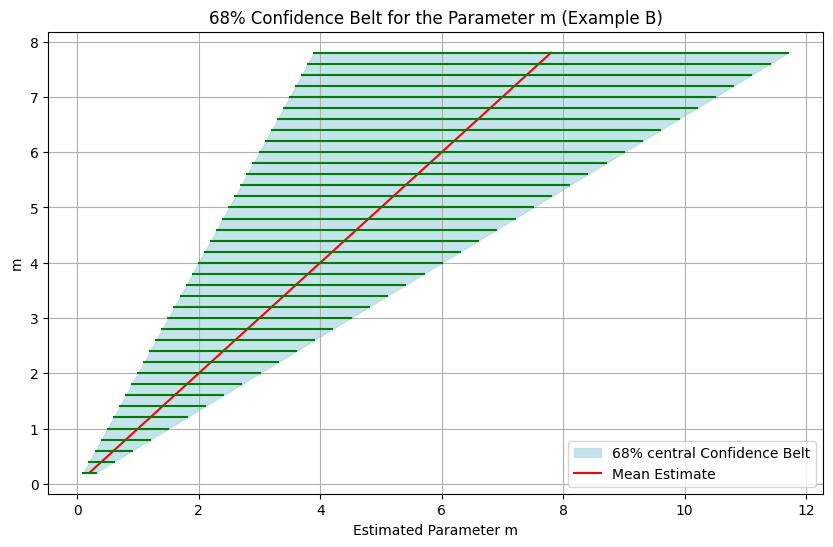

In [6]:
# Show the confidence belt for these examples. For m between 0.2 and 8 (vertical axis), the
# confidence belt is the area between the two lines that are 1 standard deviation away from
# the mean (horizontal axis).

example = 'B'

m = np.arange(0.2, 8, 0.2)
central_ranges = []
for m_value in m:
    if example == 'A':
        # For example A, the standard deviation is 1
        std_dev = 1
    elif example == 'B':
        # For example B, the standard deviation is m/2
        std_dev = m_value / 2
    else:
        raise ValueError("Unknown example type")
    lower_bound = m_value - std_dev  # 1 standard deviation below the mean
    upper_bound = m_value + std_dev  # 1 standard deviation above the mean
    central_ranges.append((lower_bound, upper_bound))
confidence_belt = np.array(central_ranges).T
# Plot the confidence belt
plt.figure(figsize=(10, 6))
plt.fill_betweenx(m, confidence_belt[0], confidence_belt[1], color='lightblue', alpha=0.7, label='68% central Confidence Belt')
plt.plot(m, m, 'r-', label='Mean Estimate')
for m_value,central_range in zip(m,central_ranges):
    plt.plot([central_range[0],central_range[1]],[m_value, m_value], 'g-')
plt.title("68% Confidence Belt for the Parameter m (Example " + example + ")")
plt.xlabel("Estimated Parameter m")
plt.ylabel("m")
plt.legend()
plt.grid()
plt.show()

In [16]:
# Now consider the credible interval for the same examples, assuming a uniform prior.
# Calculate the posterior probability distribution for the parameter m.
def posterior_distribution_uniform_prior(m_range, m_estimate, example='A'):
    """
    Calculate the posterior distribution assuming a uniform prior.

    Parameters:
    m_range (array): Range of possible values for m.
    m_estimate (float): Estimated value of m.

    Returns:
    array: Posterior probabilities for each value in m_range.
    """
    # Calculate the likelihood for each value in the range
    if example == 'A':
        # For example A, the standard deviation is 1
        std_dev = 1
    elif example == 'B':
        # For example B, the standard deviation is m/2
        std_dev = m_range / 2
    else:
        raise ValueError("Unknown experiment type")
    likelihoods = np.exp(-0.5 * ((m_range - m_estimate) / std_dev) ** 2)/ np.sqrt(2 * np.pi * std_dev ** 2)
    # Normalize the likelihoods*prior to get posterior probabilities
    posterior_probs = likelihoods / np.sum(likelihoods)
    return posterior_probs

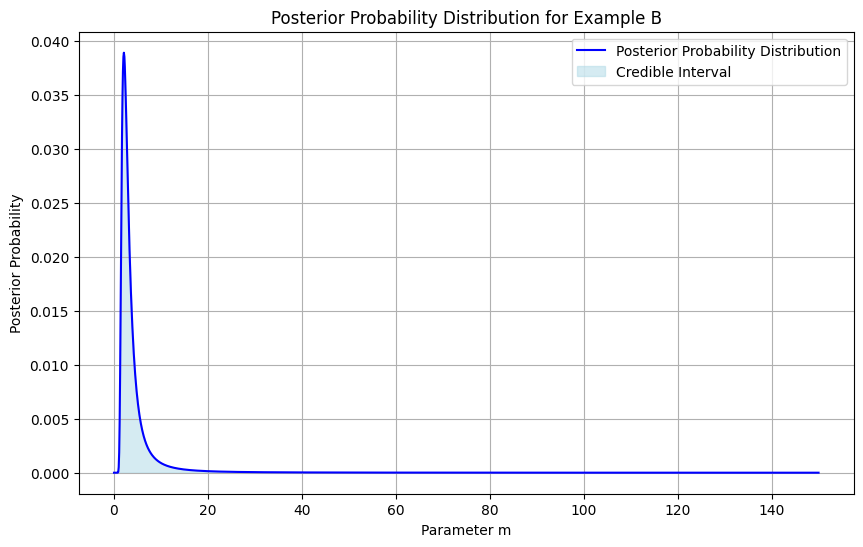

In [14]:
# show the posterior probability distribution for each example
example = 'B'
m_range = np.arange(0.1, 40, 0.1)
m_estimate = 3  # Example estimate for m
posterior_probs = posterior_distribution_uniform_prior(m_range, m_estimate, example)
# Plot the posterior probability distribution
plt.figure(figsize=(10, 6))
plt.plot(m_range, posterior_probs, 'b-', label='Posterior Probability Distribution')
plt.fill_between(m_range, posterior_probs, color='lightblue', alpha=0.5, label='Credible Interval')
plt.title("Posterior Probability Distribution for Example "+example)
plt.xlabel("Parameter m")
plt.ylabel("Posterior Probability")
plt.legend()
plt.grid()
plt.show()

In [15]:
# Find the 68% central credible interval
def credible_interval(posterior_probs, confidence_level=0.68):
    """
    Calculate the credible interval for a given posterior probability distribution.

    Parameters:
    posterior_probs (array): Posterior probabilities for each value in the range.
    confidence_level (float): Desired confidence level for the credible interval.

    Returns:
    tuple: Lower and upper bounds of the credible interval.
    """
    cumulative_probs = np.cumsum(posterior_probs)
    lower_bound_index = np.searchsorted(cumulative_probs, (1 - confidence_level) / 2)
    upper_bound_index = np.searchsorted(cumulative_probs, 1 - (1 - confidence_level) / 2)
    return m_range[lower_bound_index], m_range[upper_bound_index]
# Calculate the 68% central credible interval for example A
credible_interval = credible_interval(posterior_probs, confidence_level=0.68)

print(f"68% Central Credible Interval for Example {example}: {credible_interval}")

68% Central Credible Interval for Example B: (2.0, 5.5)
